In [12]:
from IPython import get_ipython


 # Tree Modeling

 Talk about xmas and tradition of trees...

 LED and microprocessors are game changers for decorations...

 The goal is to make the Christmas tree to blink in beautiful, complex, patterns.
 Some examples of pattern include
 - rainbow stripes moving vertically/horizontally along the tree,
 - exploding flashes originated in a random spot, emanating across the tree,
 - radial stripes rotating from the center of the tree

 These patterns are generated by a program running on a microcontroller. Here, we call this program a **Pattern-Generator Algorithm**. These algorithms are functions of time and space, thus, the position of the LED bulbs must be known. The process of estimating the LED bulb locations is named **Tree Modeling**.

 We will model the tree in this notebook using videos of the tree blinking tree. Later, we will implement the tree model in the microcontroller's pattern-generator algorithm.

In [13]:
get_ipython().run_line_magic('load_ext', 'autoreload')
get_ipython().run_line_magic('autoreload', '2')
get_ipython().run_line_magic('matplotlib', 'inline')



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


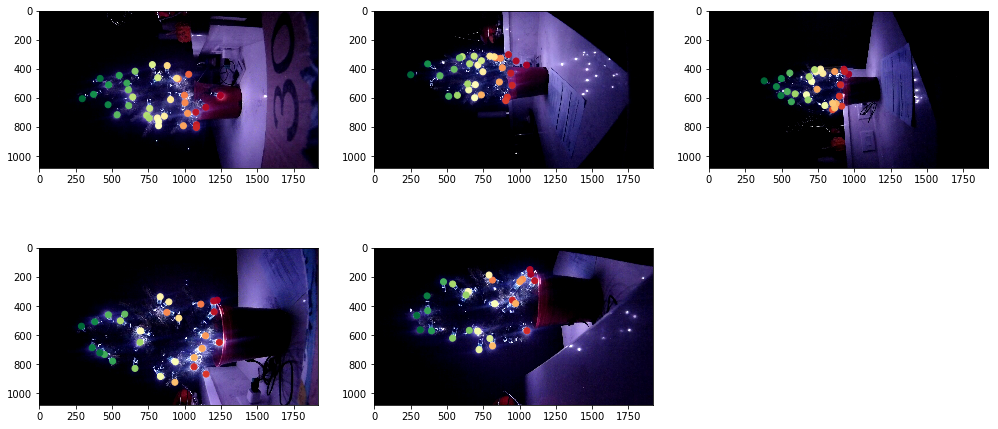

In [14]:
from xmas_lights import load_checkerboard_dataset, load_xmas_tree_dataset
from xmas_lights import load_cam_calib, plot_images, plot_extrinsics

calib_intrinsics = load_cam_calib('./akaso_calib')
K = calib_intrinsics["K"]
D = calib_intrinsics["D"]

# imgpoints, imgs, ground_truth = load_checkerboard_dataset('./akaso_calib')
imgpoints, imgs, ground_truth = load_xmas_tree_dataset()

plot_images(imgs, imgpoints)



In [15]:
from xmas_lights import Calibrator

xtmodel = Calibrator(imgpoints, K, D)
rvecs, tvecs, objpoints, res = xtmodel.extrinsic_calibration()



`xtol` termination condition is satisfied.
Number of iterations: 454, function evaluations: 501, CG iterations: 8798, optimality: 1.18e-06, constraint violation: 0.00e+00, execution time: 2.1e+01 s.


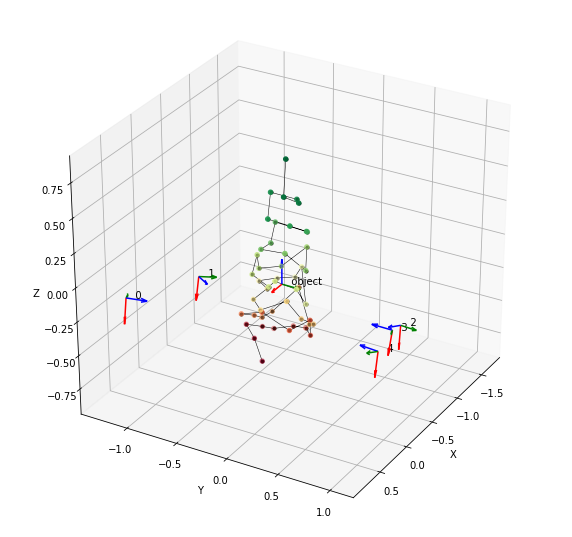

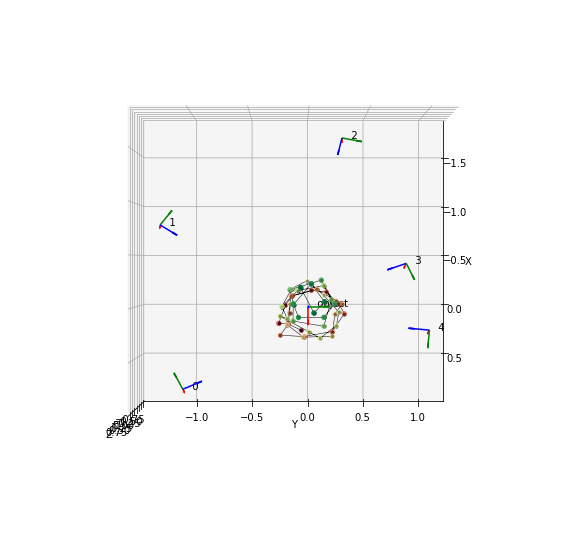

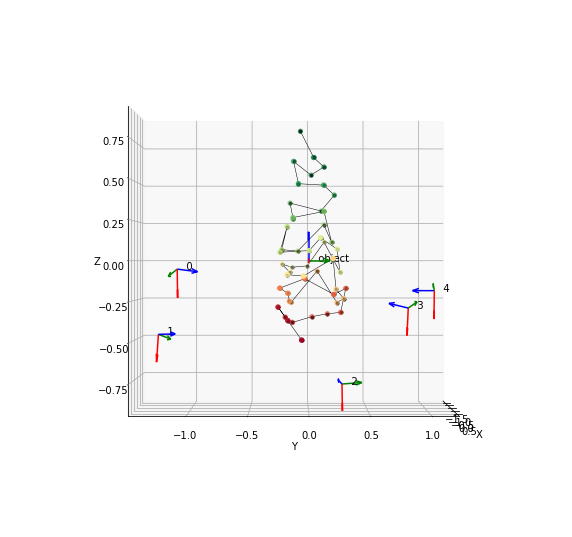

In [16]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# change inertial frame for easier viz
R0 = np.array([[0, 0, 1], [0, 1, 0], [-1, 0, 0]]).T
# R0 = np.eye(3)
objpoints2 = (objpoints.reshape(-1, 3).dot(R0)).reshape(1, -1, 3)
rvecs2 = [cv2.Rodrigues(cv2.Rodrigues(rvec)[0].dot(R0))[0] for rvec in rvecs]

ax = plot_extrinsics(rvecs2, tvecs, objpoints2)
ax.view_init(30, 30)
plt.show()

ax = plot_extrinsics(rvecs2, tvecs, objpoints2)
ax.view_init(90, 0)
plt.show()

ax = plot_extrinsics(rvecs2, tvecs, objpoints2)
ax.view_init(0, 0)
plt.show()


 ## Comparing to the ground truth

 The calibrator cannot estimate the true scale, and the position and orientation of the inertial frame. This is fine because we can manually measure the height of the tree and assign a tree origin anywhere we want.

In [17]:
# plot_extrinsics(ground_truth["rvecs"], ground_truth["tvecs"], ground_truth["objpoints"])

